# Suicide Rates Overview 1985 to 2016
## by Aisulu Omar


## Content

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

## References

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

## Inspiration

Suicide Prevention.

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
data = pd.read_csv('master.csv')

In [25]:
df_clean = data.copy()

### Assesing data 

First step will be assesing data to see if it needs any wrangling. 

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Define

#### Removing one column in order to clean data 

In [27]:
df_clean.drop(['HDI for year'],axis=1,inplace=True)

In [28]:
nRow, nCol = df_clean.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 27820 rows and 11 columns


In [29]:
df_clean['country'].nunique()

101

In [30]:
print('Min : ',df_clean.year.min())
print('Max : ',df_clean.year.max())

Min :  1985
Max :  2016


In [31]:
df_clean.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Test

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


### Data structure:
-  There are 27820 rows and 11 columns. 101 countries. Data was given from 1985 to 2016 years. 

### Main feautures of my interest: 

-  Dynamic of change of number of suicides from 1985 - 2016.

- Distribution of suicides between different generation. 

- Correlation of economic situation of the country and number of suicides per 100k population.  

- Correlation between country-year and number of suicides per 100k population. 

## Multivariate Exploration

I created seaborn's line plot to see the growth by year of number of suicides between different age groups.

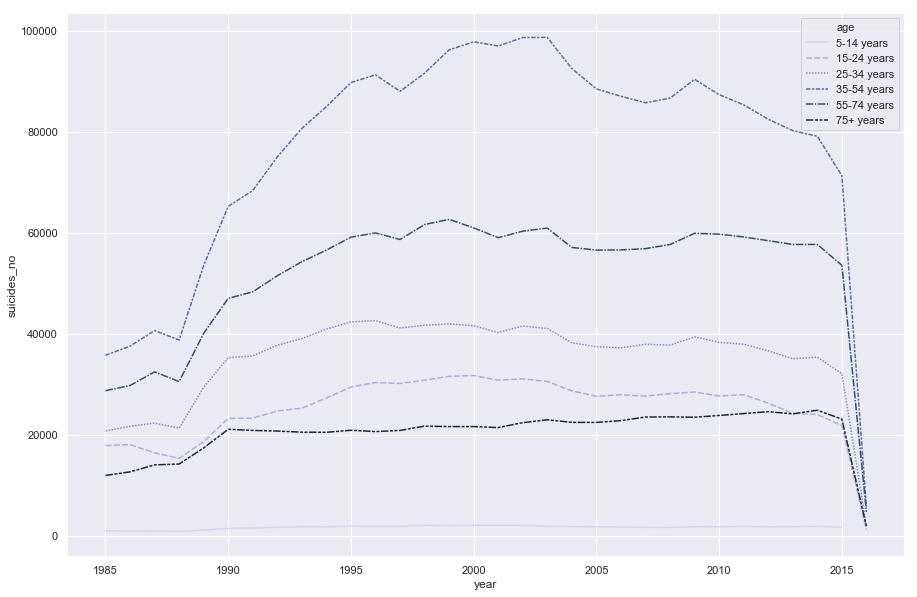

In [32]:
from matplotlib.colors import LogNorm

df_n = df_clean.groupby(['year','age']).suicides_no.sum().reset_index()
df_n['age'] = df_n.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df_n,hue_norm=LogNorm(),palette='ch:2.5,.25',sort=False);

#### Fingings: 

- The age group between 35-54 years has the highest number of suicides. 
- Highest spike of suicides was in a year 2000, then slowly decreased by 2015.
- The age group between 5-14 has the lowest number of suicides. 


## Bivariate Exploration

Correlation between GDP per capita and number of suicides per 100k population. I created a scatterplot to see the distibution of data and correlation between two variables. 

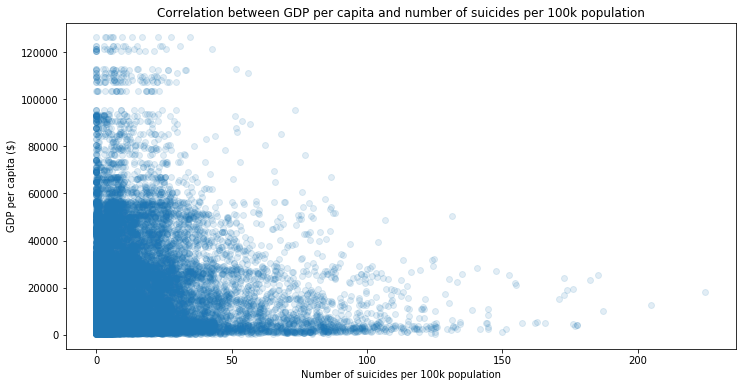

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(data=df_clean,x='suicides/100k pop',y='gdp_per_capita ($)',alpha=1/8)
plt.title('Correlation between GDP per capita and number of suicides per 100k population')
plt.xlabel('Number of suicides per 100k population')
plt.ylabel('GDP per capita ($)');

#### Findings:

- Most of the data falls in a large blob between 0 to 60000 (GDP per capita) on y axis, and between 0 to 50 (Number of suicides per 100k population) on x axis. 
- There is slight trend showing that countires with lower GDP have higher numbers of suicides. However, there are a lot of outliers. 

### Univariate exploration 

Count of suicides of different generations. I used seaborn's countplot to see the distribution of suicides in different generations. 

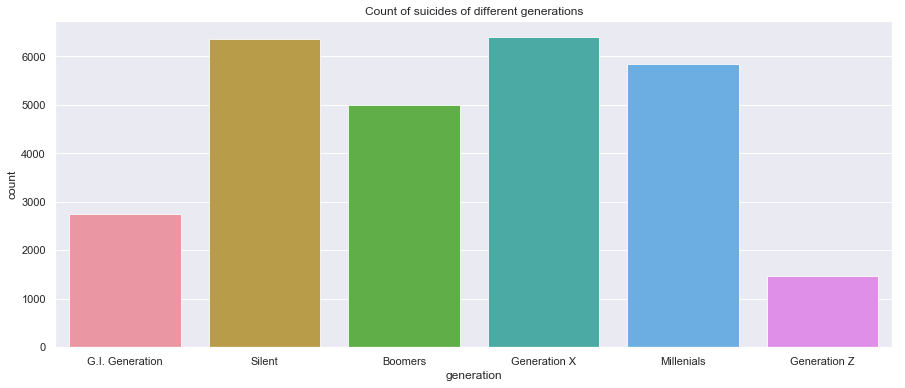

In [35]:
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

plt.figure(figsize=(15,6))
plt.title('Count of suicides of different generations')
y = df_clean['generation']
sns.set_context('paper',2.0,{"lines.linewidth": 4})
sns.countplot(y,label='generation',order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z']);

#### Findings:

- Silent and Generation X overall has the higherst number of suicides. 
- Generation Z overall has the lowest number of suicedes. 

In [21]:
df_clean.to_csv('master_file.csv',encoding='utf-8', index=False)